# PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_wine, fetch_kddcup99

*Ex. 1*

In [3]:
data = load_wine()

In [4]:
df = pd.DataFrame(data.data)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
df[0] = pd.to_numeric(df[0], errors='coerce')
df[1] = pd.to_numeric(df[1], errors='coerce')

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [10]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [13]:
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [14]:
df_scaled.var()

0     1.00565
1     1.00565
2     1.00565
3     1.00565
4     1.00565
5     1.00565
6     1.00565
7     1.00565
8     1.00565
9     1.00565
10    1.00565
11    1.00565
12    1.00565
dtype: float64

*Ex 1a*

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, data.target, test_size=.25, random_state=700)

*Ex 2*

In [17]:
cov_mrx = np.cov(X_train)

*Ex 3*

In [18]:
values, vectors = np.linalg.eig(cov_mrx)

In [19]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

*Ex 4*

In [20]:
zipped_lists = zip(values, vectors)

sorted_pairs = sorted(zipped_lists, reverse=True)


tuples = zip(*sorted_pairs)
values, vectors = [ list(tuple) for tuple in  tuples]

*Ex 5*

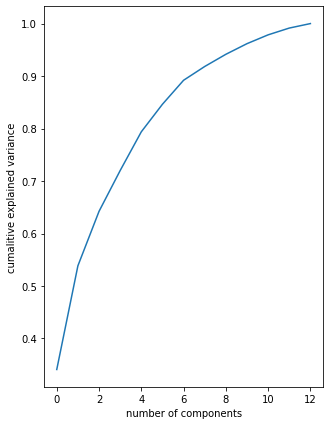

In [21]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumalitive explained variance')
plt.gcf().set_size_inches(5, 7)

In [22]:
values[:5]

[(44.49961279984814+0j),
 (23.198513243803784+0j),
 (11.856933025795174+0j),
 (11.218062185329112+0j),
 (9.067281194250638+0j)]

In [23]:
pca =  PCA(svd_solver='full', n_components=0.95)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data=principal_components)
principal_df.head()

,0,1,2,3,4,5,6,7,8,9
0,3.059906,-0.495951,0.722689,-0.669585,-1.113905,-1.217761,-0.427806,0.403040,0.280602,0.230598
1,-2.441608,-1.093921,-1.718673,0.798489,-0.770453,-0.218073,0.099351,0.511301,0.471119,0.193747
2,2.717276,-0.566617,-1.252046,-0.663194,0.303456,1.813005,0.357605,-0.392298,0.027520,0.853801
3,-0.469614,-0.358846,0.126747,1.328514,0.758569,-1.043077,0.185946,-0.409370,0.573081,-0.031182
4,1.445942,1.285569,-0.414366,-0.942583,0.769718,-1.040085,0.562576,-0.771037,0.356460,0.008699


In [24]:
vectors[:5]

[array([ 1.34370920e-01+0.j        ,  3.64697030e-02+0.j        ,
         8.32488651e-02+0.j        ,  1.44794935e-02+0.j        ,
         4.75525281e-02+0.j        ,  1.35353839e-01+0.j        ,
        -3.40463039e-02+0.j        ,  7.10321833e-02+0.j        ,
        -6.52244587e-03+0.j        ,  2.16260143e-02+0.j        ,
         1.12142823e-01+0.j        , -1.74565415e-03+0.j        ,
        -4.02982495e-01+0.j        ,  5.51165871e-01+0.j        ,
         5.51165871e-01-0.j        ,  2.22857254e-02-0.09574645j,
         2.22857254e-02+0.09574645j,  1.24216441e-02+0.j        ,
         1.94067469e-02-0.03606534j,  1.94067469e-02+0.03606534j,
         4.47786300e-02+0.02509051j,  4.47786300e-02-0.02509051j,
         8.72777995e-02+0.0555606j ,  8.72777995e-02-0.0555606j ,
         8.47113566e-02-0.0529682j ,  8.47113566e-02+0.0529682j ,
         6.33649640e-03-0.06030863j,  6.33649640e-03+0.06030863j,
        -1.31424349e-01+0.j        , -5.76083538e-05-0.07519572j,
        -5